In [13]:
from scipy.fft import fftn, ifftn
from scipy.fft import fft, ifft,fftshift
from scipy.signal import convolve2d as conv2
from skimage.exposure import equalize_adapthist, rescale_intensity
import cv2
import skimage.io as io
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter
from scipy.ndimage.filters import convolve
from skimage.color import rgb2gray
import skimage


In [14]:
def fabricateGaussianOctave(s ,sigma,image):
   gaussianOctave=[]
   t=np.power(2,1/s)
   for i in np.arange(0,s+4):
     blurred = gaussian_filter(image,(np.power(t,i))*sigma)
     gaussianOctave.append(blurred)
   return gaussianOctave

def fabricateDOG_Octave(input,s):
  DOG_Octave=[]
  for i in np.arange(1,s+4):
    difference = input[i]-input[i-1]
    DOG_Octave.append(difference)
  return DOG_Octave

def localExtremaDetermination(dog,s):
  DOG_Array = np.array(dog)
  m,n,p = DOG_Array.shape
  impList=[]
  num=0 #Number of imp points 
  s+=1
  keypointMatrix = np.zeros((n,p))
  i=1
  while i>=1 and i<(m-1):
      j=1
      while j>=1 and j<(n-1):
          k=1
          while k>=1 and k<(p-1):
              midvalue =DOG_Array[i,j,k] 
              valueArray = DOG_Array[i-1:i+2,j-1:j+2,k-1:k+2] # 26 values stored (9+9+8)
              max = valueArray.max()
              min = valueArray.min()
              if (midvalue>=max or midvalue<=min):
                  keypointMatrix[j+1:j+3,k+1:k+3] =1
                  num+=1
              k+=1
          j+=1
      impList.append(keypointMatrix)
      keypointMatrix = np.zeros((n,p))
      i+=1
  print("No of imp points detected is", num)
  return impList


def StepFirstSIFT(image):
  out=fabricateGaussianOctave(4,1.2,image)  
  dog =fabricateDOG_Octave(out,4)
  keyp = localExtremaDetermination(dog,4)
  plt.title("Image after application of SIFT")
  io.imshow(np.where(keyp[0]==1,np.max(image),image),cmap='gray')
  plt.show()


In [15]:
def supervisorFun(image):
  StepFirstSIFT(image)

  from skimage.transform import rotate
  rotatedImage=rotate(image,45,resize=True)
  plt.title("Rotated Image")
  io.imshow(rotatedImage)
  plt.show()
  StepFirstSIFT(rotatedImage)
  

  blurredImage = gaussian_filter(image,3)
  plt.title("blurred Image")
  io.imshow(blurredImage)
  plt.show()
  StepFirstSIFT(blurredImage)


  rescaledImage = rescale(image, 0.1, anti_aliasing=False)
  plt.title("Rescaled Image")
  io.imshow(rescaledImage)
  plt.show()
  StepFirstSIFT(rescaledImage)



  noise_img = random_noise(image, mode='s&p',amount=0.01)
  plt.title("Noisy Image")
  io.imshow(noise_img)
  plt.show()
  StepFirstSIFT(noise_img)





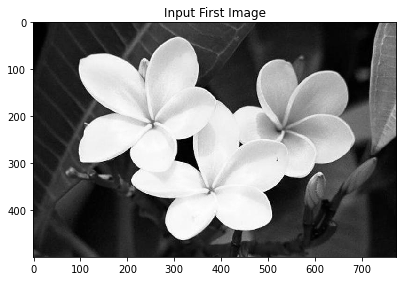

No of imp points detected is 4091


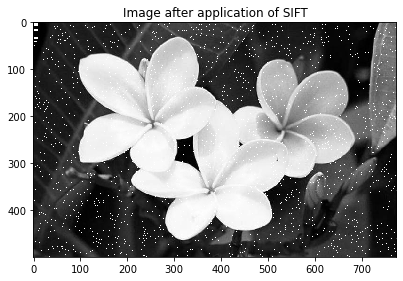

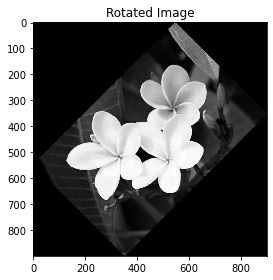

No of imp points detected is 1920239


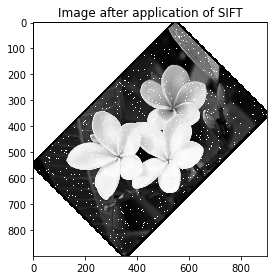

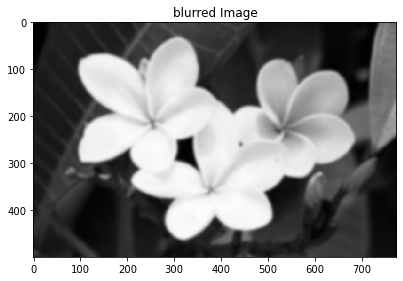

No of imp points detected is 756


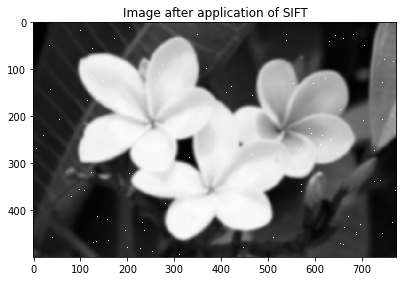

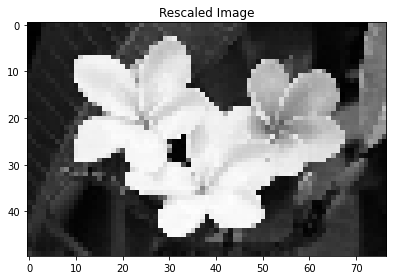

No of imp points detected is 32


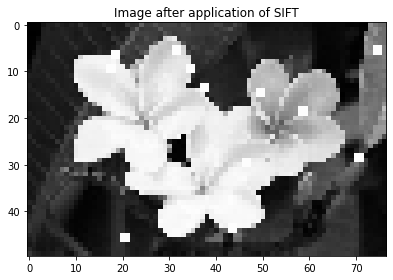

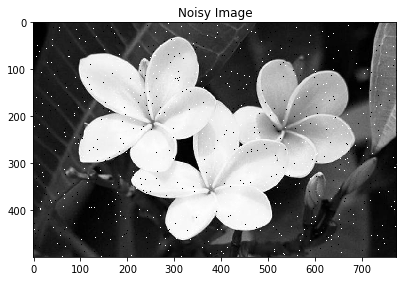

No of imp points detected is 2995


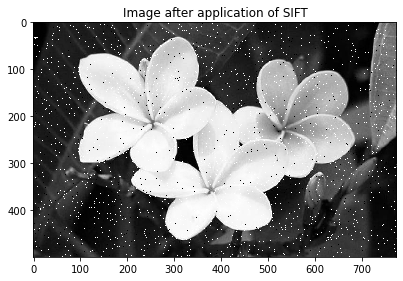

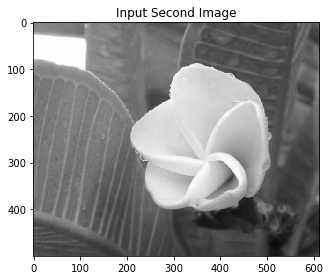

No of imp points detected is 7405


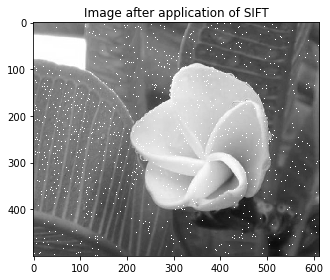

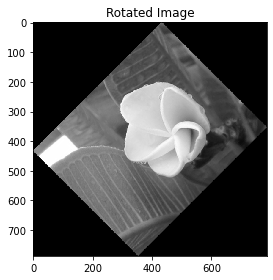

No of imp points detected is 1395511


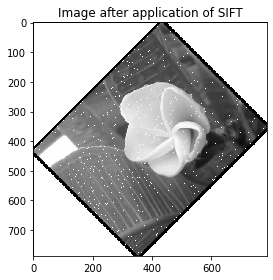

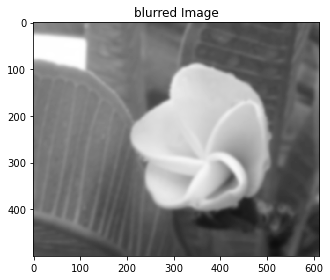

No of imp points detected is 554


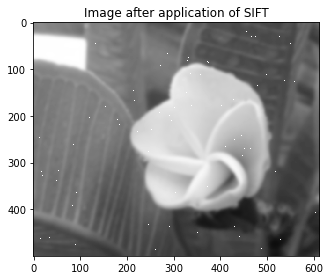

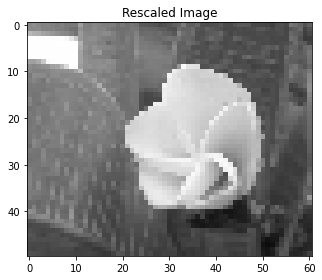

No of imp points detected is 25


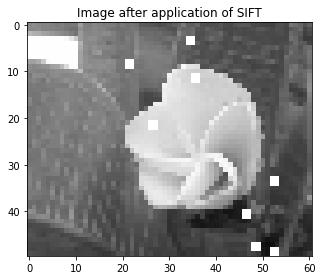

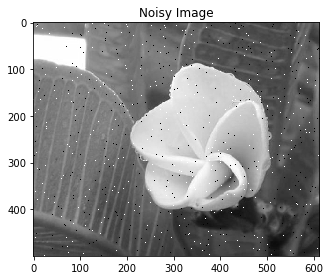

No of imp points detected is 2397


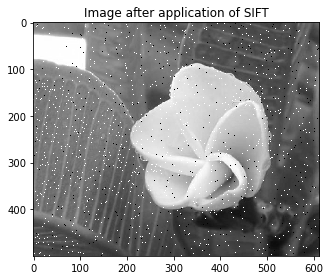

In [16]:
def processImage(imagepath):
    image = io.imread(imagepath)
    image = rgb2gray(image)
    image = skimage.img_as_float(image)
    io.imshow(image)
    plt.show()
    supervisorFun(image)

import warnings
warnings.filterwarnings("ignore")

imagepath1="image_00794.jpg"
plt.title("Input First Image")
processImage(imagepath1)
imagepath2="image_00811.jpg"
plt.title("Input Second Image")
processImage(imagepath2)